In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import scipy.spatial.distance as dist
from sklearn.neighbors import DistanceMetric
from scipy.spatial.distance import cdist

In [ ]:
spiff_original = pd.read_csv('spiffs measurements.csv')
spiff = spiff_original.drop(labels=['color', 'tale', 'wings'], axis=1)

4
[3 3 3 ... 1 3 3]


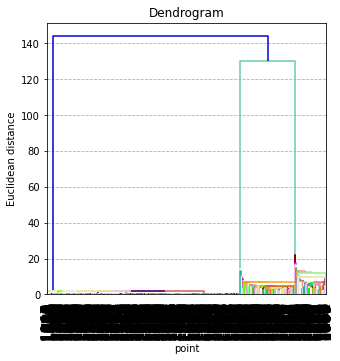

In [6]:
spiff_dend = spiff.copy()
spiff_dend.index = range(1, spiff_dend.shape[0]+1)
hcmodel = AgglomerativeClustering(n_clusters=4)
hcmodel.fit(spiff)

print(hcmodel.n_clusters)
print(hcmodel.labels_)

colors = list(matplotlib.colors.cnames.keys())

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
distances = linkage(spiff_dend, method='single')
ax.set_title('Dendrogram')
ax.set_xlabel('point')
ax.set_ylabel('Euclidean distance')
ax.grid(linestyle='--', axis='y')

dgram = dendrogram(distances, labels=list(range(1, spiff_dend.shape[0]+1)), link_color_func=lambda x: colors[(x % 100)+30], leaf_font_size=15, ax=ax)
plt.show()

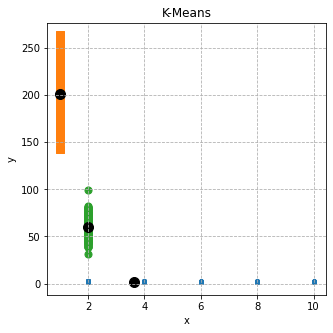

In [7]:
spiff_eyes_length = spiff[['eyes', 'length']].copy()

kmeansmodel = KMeans(n_clusters=3)
kmeansmodel.fit(spiff_eyes_length)


fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(linestyle='--')
ax.set_title('K-Means')
labels = set(kmeansmodel.labels_)
markers = list(matplotlib.markers.MarkerStyle.markers.keys())


for m, l in zip(markers, labels):
    indices = np.where(kmeansmodel.labels_ == l)[0]
    # print(indices)
    ax.scatter(spiff_eyes_length.iloc[indices]['eyes'],
               spiff_eyes_length.iloc[indices]['length'], marker=m, s=50)
ax.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[
           :, 1], marker='o', c='black', s=100)

plt.show()

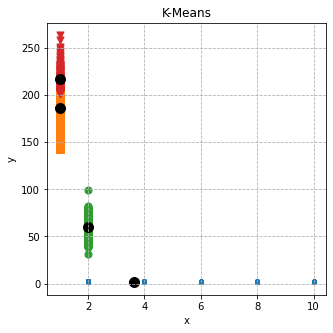

In [8]:
#e
kmeansmodel = KMeans(n_clusters=4)
kmeansmodel.fit(spiff_eyes_length)

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(linestyle='--')
ax.set_title('K-Means')
labels = set(kmeansmodel.labels_)
markers = list(matplotlib.markers.MarkerStyle.markers.keys())


for m, l in zip(markers, labels):
    indices = np.where(kmeansmodel.labels_ == l)[0]
    # print(indices)
    ax.scatter(spiff_eyes_length.iloc[indices]['eyes'],
               spiff_eyes_length.iloc[indices]['length'], marker=m, s=50)
ax.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[
           :, 1], marker='o', c='black', s=100)

plt.show()